In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
results = pd.read_csv('./../../../biorad/experiments/baseline/baseline_nofilter_dfs.csv', index_col=0)
results.head()

,exp_id,model_id,test_score,test_score_variance,train_score,train_score_variance
0,684,ReliefFSelection_PLSREstimator,0.531054,0.001266,0.537104,0.000053
1,559,ReliefFSelection_PLSREstimator,0.504772,0.000226,0.529223,0.000108
2,629,ReliefFSelection_PLSREstimator,0.479772,0.000687,0.513389,0.000232
3,192,ReliefFSelection_PLSREstimator,0.500000,0.000000,0.505882,0.000062
4,835,ReliefFSelection_PLSREstimator,0.530769,0.000828,0.523492,0.000255


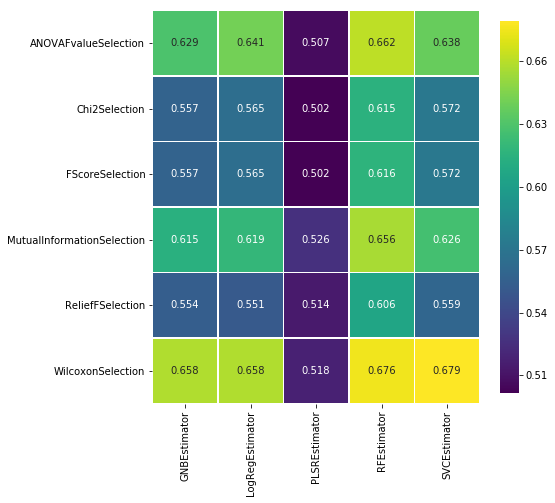

In [88]:
model_grps = results.groupby('model_id')
_avg_scores = model_grps['test_score'].mean()

_rows, _cols = zip(*list(map(lambda label: label.split('_'), _avg_scores.index)))
rows = np.unique(_rows)
cols = np.unique(cols)

avg_scores = model_grps['test_score'].mean().values.reshape(np.size(rows), np.size(cols))

plt.figure(figsize=(8, 8))
sns.heatmap(
    avg_scores,
    yticklabels=rows,  
    xticklabels=cols,
    vmin=np.nanmin(avg_scores) - 1e-4, 
    vmax=np.nanmax(avg_scores) + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.3f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.8},  
)
plt.tight_layout()